### M1 T02: Data exploration and structure - Dataframes with Pandas

This practice focuses on becoming familiar with data exploration techniques through data structure. For this purpose, the Pandas library is used, its instances (Dataframes) and its methods.

### Level 1

#### Exercise 1
Objetive:
* Download a dataset (Airlines Delay)
* Load the dataset into a dataframe
* Viewing and filtering data

In [1]:
# Import pandas library using the alias "pd"
import pandas as pd

# import others needed libraries
import matplotlib.pyplot as plt
import numpy as np

#import datetime as dt
#import unicodecsv
#import seaborn as sns
#from scipy import stats
#from scipy.stats import norm

# Float format definition
pd.options.display.float_format = '{:.0f}'.format

#Load Airlines Delays dataset
df = pd.read_csv('DelayedFlights.csv')

In [2]:
# Viewing the first 5 records.
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Viewing the last 3 records.
df.tail(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936755,7009718,2008,12,13,6,1007,847,1149,1010,DL,...,8,32,0,N,0,1,0,19,0,79
1936756,7009726,2008,12,13,6,1251,1240,1446,1437,DL,...,13,13,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110,1103,1413,1418,DL,...,8,11,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking some statistics of the dataset. This methode excludes NaN values.
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758,1936758,1936758,1936758,1936758,1936758,1936758,1929648,1936758,1936758,...,1936758,1929648,1936303,1936758,1936758,1247488,1247488,1247488,1247488,1247488
mean,3341651,2008,6,16,4,1519,1467,1610,1634,2184,...,766,7,18,0,0,19,4,15,0,25
std,2066065,0,3,9,2,450,425,548,465,1945,...,574,5,14,0,0,44,21,34,2,42
min,0,2008,1,1,1,1,0,1,0,1,...,11,0,0,0,0,0,0,0,0,0
25%,1517452,2008,3,8,2,1203,1135,1316,1325,610,...,338,4,10,0,0,0,0,0,0,0
50%,3242558,2008,6,16,4,1545,1510,1715,1705,1543,...,606,6,14,0,0,2,0,2,0,8
75%,4972467,2008,9,23,6,1900,1815,2030,2014,3422,...,998,8,21,0,0,21,0,15,0,33
max,7009727,2008,12,31,7,2400,2359,2400,2400,9742,...,4962,240,422,1,1,2436,1352,1357,392,1316


##### Figure 1

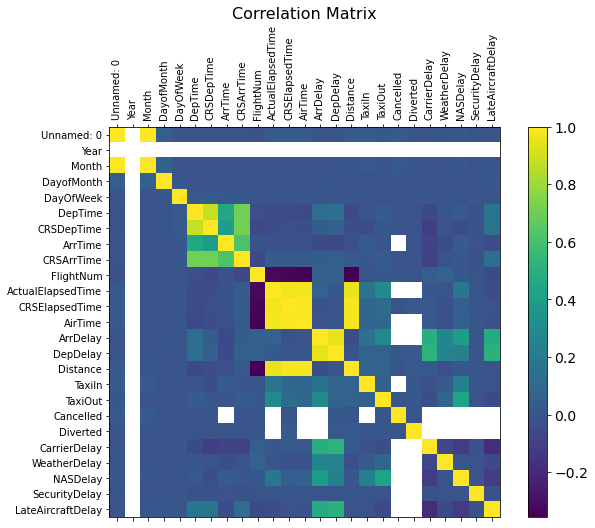

In [5]:
# Creating and ploting a correlation matrix in order to filter the relevants columns 
corrMatrix = df.corr()

#Formatting the canvas
fig = plt.figure(figsize = (10, 7))
plt.matshow(corrMatrix, fignum = fig.number)

# As the df.corr() method ignores non-numerical columns, df.select_dtypes(['number'])
# should be used when defining the x and y labels to avoid an unwanted shift of the labels.
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
colorBar = plt.colorbar()
colorBar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [6]:
# According to the correlation matrix, some columns can be removed and others unified in order to clean up the dataset.
# Here some examples:

# creating a new variable for the date 
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

# dropping the unwanted data
df = df.drop(['Unnamed: 0', 'FlightNum','TailNum'], axis = 1) # Irrelevant columns
df = df.drop(['Year','Month','DayofMonth'] , axis = 1) # Incluided into 'DepDate'

In [7]:
df.head(3)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
0,4,2003,1955,2211,2225,WN,128,150,116,-14,...,8,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,4,754,735,1002,1000,WN,128,145,113,2,...,10,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,4,628,620,804,750,WN,96,90,76,14,...,17,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [8]:
# Another way to visualize the correlation matrix, rather than creating a plot per se,
# it's using the convenient pandas styling options
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,1.00,0.02,0.03,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.01,-0.01,0.00,-0.00,0.01,0.01,-0.01,0.00,0.01
DepTime,0.02,1.00,0.88,0.46,0.71,-0.05,-0.04,-0.05,0.13,0.14,-0.06,-0.01,0.03,0.00,-0.00,-0.05,0.01,0.02,-0.02,0.17
CRSDepTime,0.03,0.88,1.00,0.40,0.71,-0.03,-0.03,-0.04,0.04,0.06,-0.03,-0.03,0.01,0.00,-0.01,-0.11,-0.01,-0.03,-0.02,0.17
ArrTime,0.01,0.46,0.40,1.00,0.62,-0.01,-0.01,-0.02,-0.05,-0.05,-0.03,0.04,0.00,nan,-0.01,-0.08,-0.03,0.03,-0.01,-0.04
CRSArrTime,0.02,0.71,0.71,0.62,1.00,0.03,0.04,0.03,0.04,0.05,0.02,0.01,0.04,0.00,0.00,-0.10,-0.01,0.01,-0.01,0.13
ActualElapsedTime,0.00,-0.05,-0.03,-0.01,0.03,1.00,0.97,0.98,0.07,0.02,0.95,0.17,0.29,nan,nan,0.01,0.00,0.18,0.01,-0.03
CRSElapsedTime,0.00,-0.04,-0.03,-0.01,0.04,0.97,1.00,0.99,-0.02,0.01,0.98,0.10,0.12,-0.00,0.02,0.03,-0.02,0.05,0.01,-0.01
AirTime,0.00,-0.05,-0.04,-0.02,0.03,0.98,0.99,1.00,-0.00,-0.00,0.98,0.08,0.09,nan,nan,0.02,-0.02,0.06,0.01,-0.02
ArrDelay,0.01,0.13,0.04,-0.05,0.04,0.07,-0.02,-0.00,1.00,0.95,-0.03,0.16,0.29,nan,nan,0.50,0.26,0.39,-0.00,0.48
DepDelay,0.01,0.14,0.06,-0.05,0.05,0.02,0.01,-0.00,0.95,1.00,-0.01,0.07,0.08,0.02,0.02,0.53,0.24,0.23,-0.00,0.51


#### Exercise 2
Statistical analysis of the dataframe

In [9]:
# Getting basic statistics for a specific column.
df["DayOfWeek"].describe()

count   1936758
mean          4
std           2
min           1
25%           2
50%           4
75%           6
max           7
Name: DayOfWeek, dtype: float64

In [10]:
# Searching for missing values in the dataset
df.isna().sum()

DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
DepDate                   0
dtype: int64

In [11]:
# Creating a column with the average speed
# Distance in miles, Airtime in min, speed in Km/h
df["AverageSpeed"] = 1.60934*60*df["Distance"]/df["AirTime"]
df["AverageSpeed"]

0         674
1         692
2         654
3         646
4         764
           ..
1936753   729
1936754   595
1936755   545
1936756   578
1936757   811
Name: AverageSpeed, Length: 1936758, dtype: float64

*Note: Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. In cases of cancelation or diversion there's no data related to delay causes.*

In [12]:
# Creating a new colum called "Status" that categorize if the flight was on time (0),
# slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] > 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
df["Status"].value_counts()

1    767184
0    713359
2    447828
3      7754
4       633
Name: Status, dtype: int64

##### Figure 2

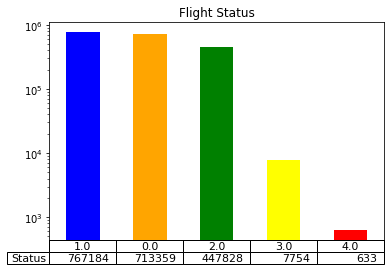

In [13]:
# Ploting the fligth status.
# y axis in log scale

myplot = df.Status.value_counts().plot(kind="bar", x = "Status", y = "Counts", title = "Flight Status",
                              logy = True, table = True, color = ['blue','orange','green','yellow','red']) 
myplot.axes.get_xaxis().set_visible(False)
myplot.tables[0].set_fontsize(11)


According to the previous graphic:
* There are 713.359 registrations with a delay in arrival less than or equal to 15 min *(Status=0)*
* That year there were 767.184 flights with delays of more than 15 minutes *(Status=1)*
* There were 447,828 flights with delays greater than 1 hour (Status=2)
* There were 7.754 diversions *(Status=3)* and 633 cancellations *(Status=4)*

##### Table 1

Here we show a summary table for the carriers showing several totals and averages

In [14]:
grouped=df.groupby("UniqueCarrier").agg({
    "UniqueCarrier":'count',
    "Cancelled": 'sum',
    "Diverted": 'sum',
    "AirTime" : 'mean',
    "Distance": 'mean',
    "TaxiIn": 'mean',
    "TaxiOut": 'mean'    
})

carrier_pct_cancelled = 100*np.divide(grouped["Cancelled"], grouped["UniqueCarrier"])
carrier_pct_cancelled = carrier_pct_cancelled.map('{:.2f}'.format)

# count the number of flight delayed (Status = 1 >15 min) for every carrier
carrier_ArrDelay= df[df["Status"]==1].groupby(df['UniqueCarrier']).count()["ArrDelay"]

#names taked from https://www.bts.gov/topics/airlines-and-airports/airline-codes
carrier_names = pd.Series(['Endeavor Air', 'American Airlines','Aloha Airlines', 'Alaska Airlines', 'Jetblue Airways',
                           'Continental Airlines', 'Delta Airlines', 'ExpressJet Airlines', 'Frontier Airlines', 
                           'AirTran Airways', 'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 
                           'PSA Airlines','SkyWest Airlines', 'United Airlines', 'US Airways', 
                           'Southwest Airlines','ExpressJet Airlines', 'Mesa Airlines'], index=grouped.index)

summary_table_carrier = pd.concat([carrier_names, carrier_ArrDelay, carrier_pct_cancelled, grouped], axis=1)

summary_table_carrier.columns = ['Carrier Name', 'arrival delay (>15min)', 'Percent Cancelled', 'Total Flights','Cancelled Flights', 
                         'Diverted Flights', 'Average Flight Time (minutes)', 'Average Flight Distance (miles)',
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']

summary_table_carrier


,Carrier Name,arrival delay (>15min),Percent Cancelled,Total Flights,Cancelled Flights,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UniqueCarrier,,,,,,,,,,
9E,Endeavor Air,21081,0.11,51885,58,258,73,464,8,21
AA,American Airlines,78448,0.02,191865,46,909,144,1082,8,19
AQ,Aloha Airlines,264,0.00,750,0,6,115,890,4,8
AS,Alaska Airlines,16276,0.03,39293,11,272,130,945,6,16
B6,Jetblue Airways,19789,0.02,55315,10,380,150,1108,6,25
CO,Continental Airlines,34608,0.04,100195,38,426,166,1240,8,24
DL,Delta Airlines,46568,0.02,114238,21,489,132,969,9,23
EV,ExpressJet Airlines,33807,0.04,81877,29,86,72,461,7,18
F9,Frontier Airlines,12024,0.01,28269,2,43,122,897,7,16


##### Table 2

In [15]:
# This dataframe contains the count for each airline categorized according to the Status described above.
tableCarriers = df.groupby(['UniqueCarrier','Status']).size()
tableCarriers = tableCarriers.unstack(1)
tableCarriers

Status,0,1,2,3,4
UniqueCarrier,,,,,
9E,16733,21081,13755,258,58
AA,61509,78448,50953,909,46
AQ,423,264,57,6,NaN
AS,15670,16276,7064,272,11
B6,17387,19789,17749,380,10
CO,42234,34608,22889,426,38
DL,43468,46568,23692,489,21
EV,26279,33807,21676,86,29
F9,12955,12024,3245,43,2


##### Figure 3

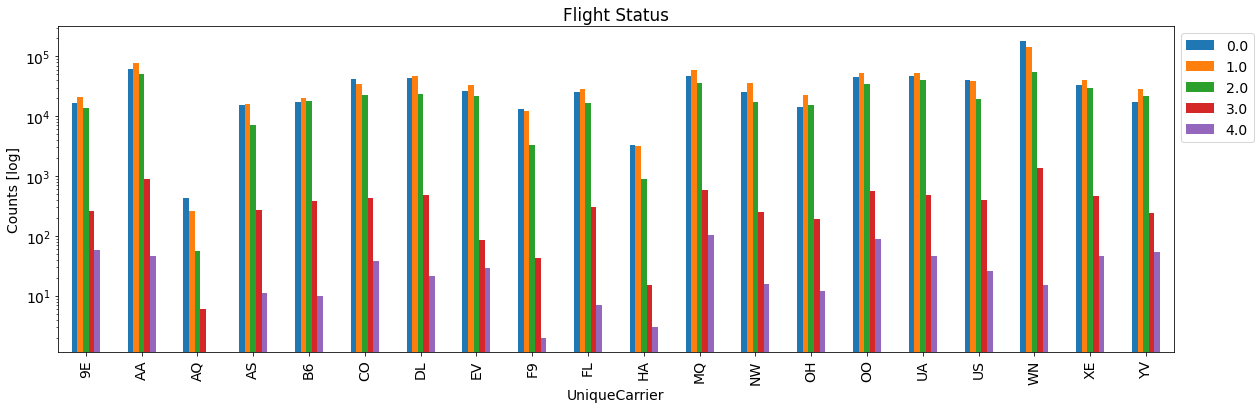

In [16]:
# Ploting the fligth status.
# y axis in log scale
plt.rcParams.update({'font.size': 14})
myplot2 = tableCarriers.plot(kind="bar", figsize=(20,6),logy = True, ylabel = 'Counts [log]', title = "Flight Status")
myplot2.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()

Important information can be extracted from the tables and figures above, such as the airline with the highest percentage of canceled flights, those with the highest number of delays, those with the highest number of diverted, etc.

In [17]:
# Saving the above table in an excel file 
tableCarriers.to_excel("sumarryDelayedFlights2008.xlsx")